In [3]:
import local_conservation_scores.tools.capra_singh_2007_scores as cs
import matplotlib.pyplot as plt
plt.style.use('custom_standard')
plt.style.use('custom_small')
import seaborn as sns
import local_seqtools.general_utils as tools
# pd.options.plotting.backend = "plotly"

In [5]:
def list_of_strings_to_list_of_columns(seqlist: list[str]):
    seqlist_filtered = [s for s in seqlist if isinstance(s, str)]
    col_strings = []
    for c in range(len(seqlist_filtered[0])):
        col = "".join([seqlist_filtered[i][c] for i in range(len(seqlist_filtered))])
        col_strings.append(col)
    return col_strings

In [14]:
aln = [
    "KGTG---GGGL---PA-PPDDF--LPP------PP--PPPPL-D",
    "RGGG---D--F---PA-PPDDF--LP-------PP--PPPPP-G",
    "KAA------GF---PA-PPDDLPPPPP------PP--PPPPP-E",
    "AGMG--N-------PS-NLEDF---PL------PP--P------",
    "QRGS-G---AYL---M-EPDTF---PA----------PPPTLQ-",
    "KFP---------P-PPQFPQSS--------F--PP--PPM-DD-",
    "AQRSPG-------IAH-KPQTY--FPP------PP--P---IQD",
    "KGSP--------K-PS-LPQRK--LPT--NF--PP--PPPSMD-",
    "KAIT-TD----------------FMPEPPQFPSPPQFPPPELPQ",
    "KEPN--------P-PRSAPQHS----Q-PAF--PP--PPP-MD-",
]
cols = list_of_strings_to_list_of_columns(aln)
for col in cols: print(col, cs.shannon_entropy(col))
scores = [cs.shannon_entropy(col) for col in cols]
zscores=tools.z_score(scores)

KRKAQKAKKK 0.5270953856346927
GGAGRFQGAE 0.30102882633464634
TGAMGPRSIP 0.12041101254158915
GG-GS-SPTN 0.21083777198736595
------P--- 0.08588166751703546
----G-G-T- 0.19553194906760288
---N----D- 0.1444941017465264
GD-------- 0.1444941017465264
G--------- 0.08588166751703545
G-G-A----- 0.19553194906760285
LFF-Y----- 0.2108381542538772
----L----- 0.08588166751703545
-----P-K-P 0.19553194906760285
------I--- 0.08588166751703545
PPPP-PAP-P 0.5214185308469409
AAASMPHS-R 0.1830071698445688
-----Q---S 0.14449410174652638
PPPNEFKL-A 0.12882184620335072
PPPLPPPP-P 0.6502234578593689
DDDEDQQQ-Q 0.4334819761149341
DDDDTSTR-H 0.270925943701182
FFLFFSYK-S 0.270925943701182
--P------- 0.08588166751703546
--P-----F- 0.14449410174652638
LLP---FLM- 0.2303754681722137
PPPPP-PPP- 0.6261411391116328
P-PLA-PTEQ 0.16267303986183893
--------P- 0.08588166751703546
--------PP 0.15653528477790815
-------NQA 0.17747017452053024
-----F-FFF 0.28308527977110026
--------P- 0.08588166751703546
--------S- 0.085881667

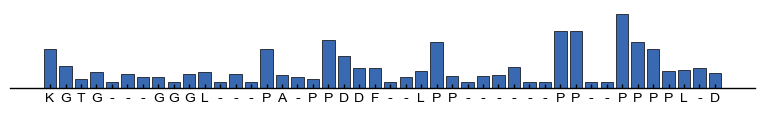

In [4]:
fig, ax = plt.subplots(figsize=(7.75, 1.25))
ax.bar(range(len(scores)), scores)
# set the x-axis ticks to be the sequence labels
# ax.set_xticks(range(len(scores)))
_ = ax.set_xticks(
    list(range(len(aln[0]))),
    labels=list(aln[0]),
)
    # ax.set_xlim(-0.5, len(xlabel_sequence) - 0.5)
    # ax.tick_params(axis="x", which="major", labelsize=labelsize)

# ax.set_xticklabels(range(1, len(scores)+1))
plt.tick_params(left=False, right=False, top=False, labelleft=False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
# plt.savefig('./RIAM/v2/scores.png', dpi=300)

In [5]:
import local_conservation_scores.tools.score_plots as score_plots
import numpy as np

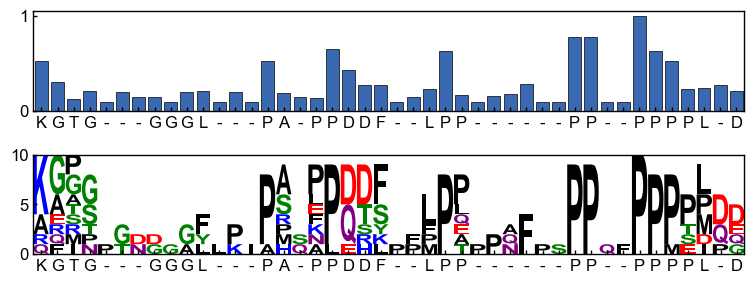

In [15]:
fig, axes = plt.subplots(nrows=2,figsize=(7.75, 3))
# change label font size
plt.rcParams.update({'font.size': 12})
score_plots.plot_score_bar_plot(axes[0], scores, aln[0])
score_plots.plot_logo(axes[1], aln, aln[0])
for ax in axes:
    ax.tick_params(axis="x", which="major", labelsize=12)
plt.tight_layout()

In [16]:
# convert list of strings to a matrix of each character
aln_matrix = np.array([list(i) for i in aln])
non_gap_ind=np.array(score_plots.get_non_gap_indexes(aln[0]))
q_nongapmat=aln_matrix[:,non_gap_ind]
q_non_gap_aln = [''.join(i) for i in q_nongapmat]
q_nongapscores=np.array(scores)[non_gap_ind]

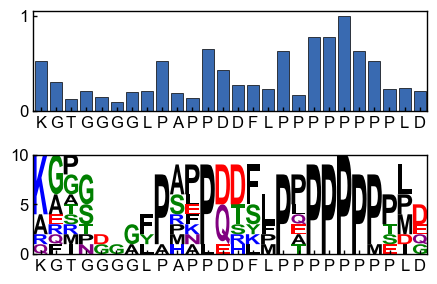

In [17]:
fig, axes = plt.subplots(nrows=2,figsize=(7.75*(q_nongapmat.shape[1]/aln_matrix.shape[1]), 3))
# change label font size
plt.rcParams.update({'font.size': 12})
score_plots.plot_score_bar_plot(axes[0], q_nongapscores, q_non_gap_aln[0])
score_plots.plot_logo(axes[1], q_non_gap_aln, q_non_gap_aln[0])
for ax in axes:
    ax.tick_params(axis="x", which="major", labelsize=12)
plt.tight_layout()

In [18]:
hit_start=15
hit_end=19
q_nongapmat[:,hit_start:hit_end+1]

array([['L', 'P', 'P', 'P', 'P'],
       ['L', 'P', '-', 'P', 'P'],
       ['P', 'P', 'P', 'P', 'P'],
       ['-', 'P', 'L', 'P', 'P'],
       ['-', 'P', 'A', '-', '-'],
       ['-', '-', '-', 'P', 'P'],
       ['F', 'P', 'P', 'P', 'P'],
       ['L', 'P', 'T', 'P', 'P'],
       ['M', 'P', 'E', 'P', 'P'],
       ['-', '-', 'Q', 'P', 'P']], dtype='<U1')

In [19]:
hit_nongapmat=q_nongapmat[:,hit_start:hit_end+1]
hit_nongap_aln = [''.join(i) for i in hit_nongapmat]
hit_nongapscores=np.array(q_nongapscores)[hit_start:hit_end+1]

In [20]:
plt.style.use('custom_standard')

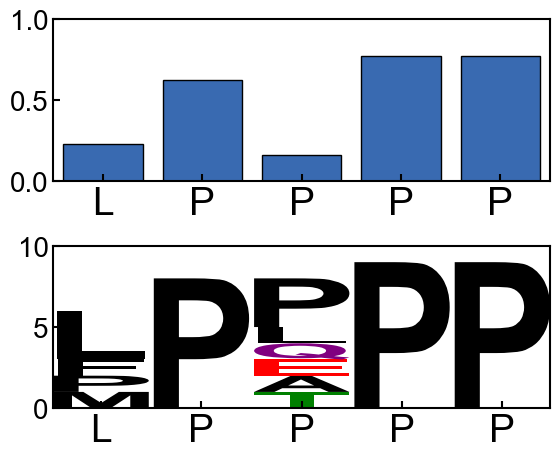

In [21]:
plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=2,figsize=(6, 5))
# change label font size
score_plots.plot_score_bar_plot(axes[0], hit_nongapscores, hit_nongap_aln[0])
score_plots.plot_logo(axes[1], hit_nongap_aln, hit_nongap_aln[0])
for ax in axes:
    ax.tick_params(axis="x", which="major", labelsize=28)
    # change the number of ticks on the y-axis
    # only show the first and last tick labels
axes[0].set_yticks([0, 0.5, 1])
axes[1].set_yticks([0, 5, 10])
axes[0].set_ylim(0, 1)
# show gridlines
# axes[0].grid(axis='y', linestyle='--')
plt.tight_layout(h_pad=0.5)
# plt.savefig('./RIAM/v2/example_alignment_logo_and_scores.png', dpi=300)

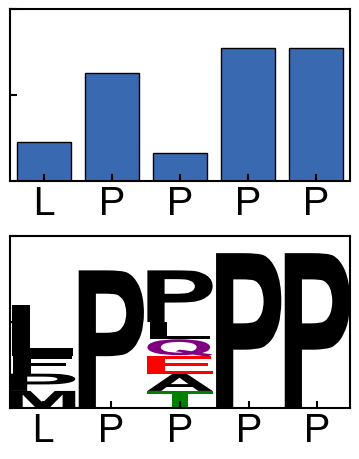

In [23]:
plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=2,figsize=(4, 5))
# change label font size
score_plots.plot_score_bar_plot(axes[0], hit_nongapscores, hit_nongap_aln[0])
score_plots.plot_logo(axes[1], hit_nongap_aln, hit_nongap_aln[0])
for ax in axes:
    ax.tick_params(axis="x", which="major", labelsize=28)
# axes[0].set_yticks([0, 0.5, 1])
# axes[1].set_yticks([0, 5, 10])
axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[0].set_ylim(0, 1)
plt.tight_layout(h_pad=0.5)

In [1]:
import local_conservation_scores.tools.score_plots as score_plots
import numpy as np

In [10]:
aln = [
    "LPPPP",
    "LPPPP",
    "LPPPP",
    "FPLPP",
    "FPAPP",
    "FPPPP",
    "FPPPP",
    "FPPPP",
    "FPSPP",
    "FPPPP",
]
cols = list_of_strings_to_list_of_columns(aln)
for col in cols: print(col, cs.shannon_entropy(col))
scores = [cs.shannon_entropy(col) for col in cols]
zscores=tools.z_score(scores)

LLLFFFFFFF 0.7347034508443858
PPPPPPPPPP 0.9999983131414484
PPPLAPPPSP 0.5915672484017673
PPPPPPPPPP 0.9999983131414484
PPPPPPPPPP 0.9999983131414484


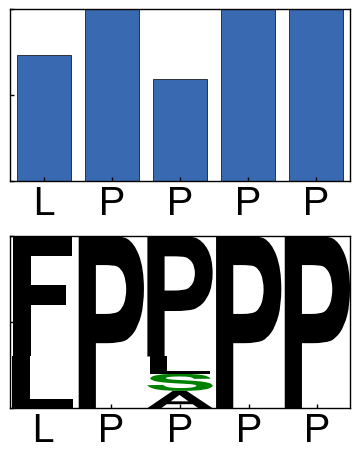

In [11]:
plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=2,figsize=(4, 5))
score_plots.plot_score_bar_plot(axes[0], scores, aln[0])
score_plots.plot_logo(axes[1], aln, aln[0])
for ax in axes:
    ax.tick_params(axis="x", which="major", labelsize=28)
# axes[0].set_yticks([0, 0.5, 1])
# axes[1].set_yticks([0, 5, 10])
# remove the y-axis labels
axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[0].set_ylim(0, 1)
plt.tight_layout(h_pad=0.5)

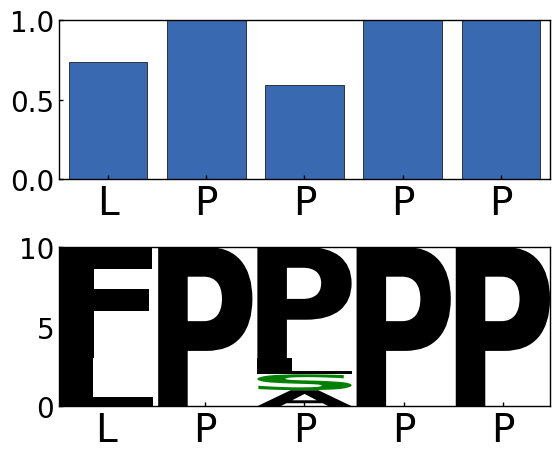

In [ ]:
plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=2,figsize=(6, 5))
# change label font size
score_plots.plot_score_bar_plot(axes[0], scores, aln[0])
score_plots.plot_logo(axes[1], aln, aln[0])
for ax in axes:
    ax.tick_params(axis="x", which="major", labelsize=28)
    # change the number of ticks on the y-axis
    # only show the first and last tick labels
axes[0].set_yticks([0, 0.5, 1])
axes[1].set_yticks([0, 5, 10])
axes[0].set_ylim(0, 1)
# show gridlines
# axes[0].grid(axis='y', linestyle='--')
plt.tight_layout(h_pad=0.5)